In [2]:

import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
# Add the scripts directory to the Python path
sys.path.append(os.path.abspath(os.path.join("..", "scripts")))
from plot import (
    plot_histogram, 
    plot_scatter, 
    plot_time_series, 
    plot_boxplot,
    plot_correlation_matrix
)

# Now you can import the functions
from utils import (
    read_csv_file,
    calculate_summary_statistics,
    calculate_correlation_matrix,
    detect_outliers,
    convert_to_datetime,
    calculate_daily_returns,
    calculate_moving_average,
)



# Load the CSV file into a DataFrame
data_info = read_csv_file("Data/yfinance_data/NVDA_historical_data.csv")
df = data_info["data"]
print("Row count: ",data_info["row_count"])

Row count:  6421


Summary Statistics:
                                 Date         Open         High          Low  \
count                           6421  6421.000000  6421.000000  6421.000000   
mean   2011-10-25 21:12:15.025697024     6.207884     6.320466     6.085095   
min              1999-01-22 00:00:00     0.034896     0.035547     0.033333   
25%              2005-06-10 00:00:00     0.277500     0.286250     0.269500   
50%              2011-10-24 00:00:00     0.457250     0.464750     0.450750   
75%              2018-03-13 00:00:00     4.182500     4.235750     4.116500   
max              2024-07-30 00:00:00   139.800003   140.759995   132.419998   
std                              NaN    16.138328    16.424862    15.794914   

             Close    Adj Close        Volume    Dividends  Stock Splits  
count  6421.000000  6421.000000  6.421000e+03  6421.000000   6421.000000  
mean      6.207702     6.181334  6.060791e+08     0.000025      0.003348  
min       0.034115     0.031291  1.968000e

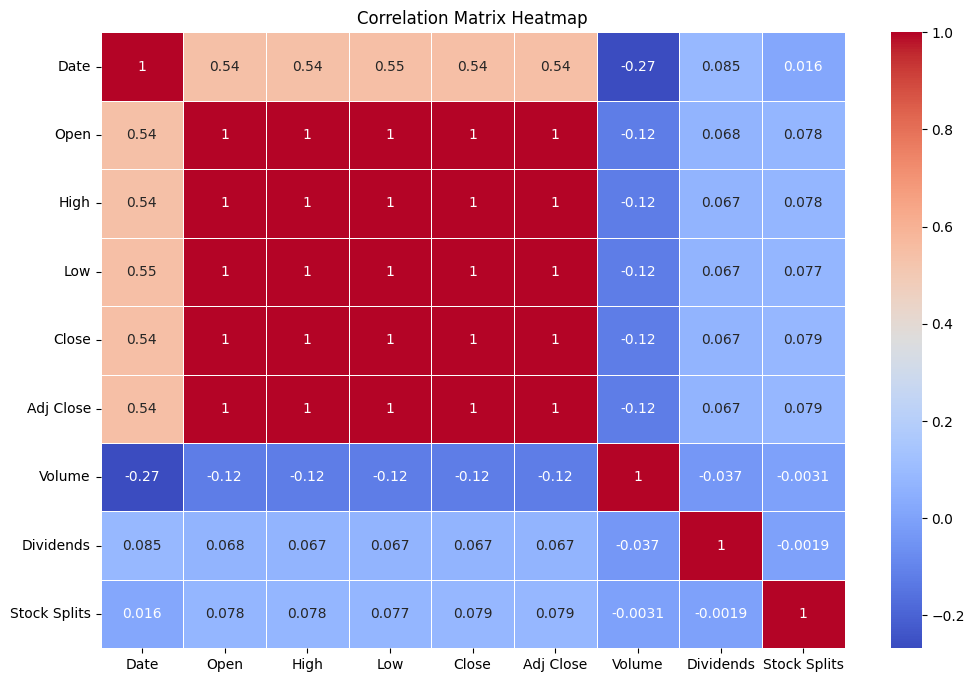

Outliers in 'Close' column:
            Date        Open        High         Low       Close   Adj Close  \
5399 2020-07-08    9.993750   10.225000    9.965500   10.216000   10.185654   
5400 2020-07-09   10.380250   10.570000   10.233500   10.509000   10.477784   
5401 2020-07-10   10.588750   10.655250   10.378750   10.479250   10.448119   
5402 2020-07-13   10.595000   10.792250   10.025000   10.052250   10.022389   
5403 2020-07-14   10.075000   10.402750    9.785500   10.377000   10.346177   
...         ...         ...         ...         ...         ...         ...   
6416 2024-07-24  119.169998  119.949997  113.440002  114.250000  114.250000   
6417 2024-07-25  113.040001  116.629997  106.300003  112.279999  112.279999   
6418 2024-07-26  116.190002  116.199997  111.580002  113.059998  113.059998   
6419 2024-07-29  113.690002  116.279999  111.300003  111.589996  111.589996   
6420 2024-07-30  111.519997  111.989998  102.540001  103.730003  103.730003   

         Volume  Divid

In [3]:
# Convert 'Date' column to datetime
data = convert_to_datetime(df, 'Date')

# Calculate summary statistics
summary_stats = calculate_summary_statistics(data)
print("Summary Statistics:\n", summary_stats)

# Calculate correlation matrix
correlation_matrix = calculate_correlation_matrix(data)
print("Correlation Matrix:\n", correlation_matrix)
plot_correlation_matrix(data)
# Detect outliers in the 'Close' column
outliers = detect_outliers(data, 'Close')
print("Outliers in 'Close' column:\n", outliers)

# Calculate daily returns for the 'Close' column
data = calculate_daily_returns(data, 'Close')
print("Daily Returns:\n", data[['Date', 'Close', 'Daily_Returns']].head())

# Calculate 20-day moving average for the 'Close' column
data = calculate_moving_average(data, 'Close', 20)
print("20-day Moving Average:\n", data[['Date', 'Close', 'MA_20']].head())

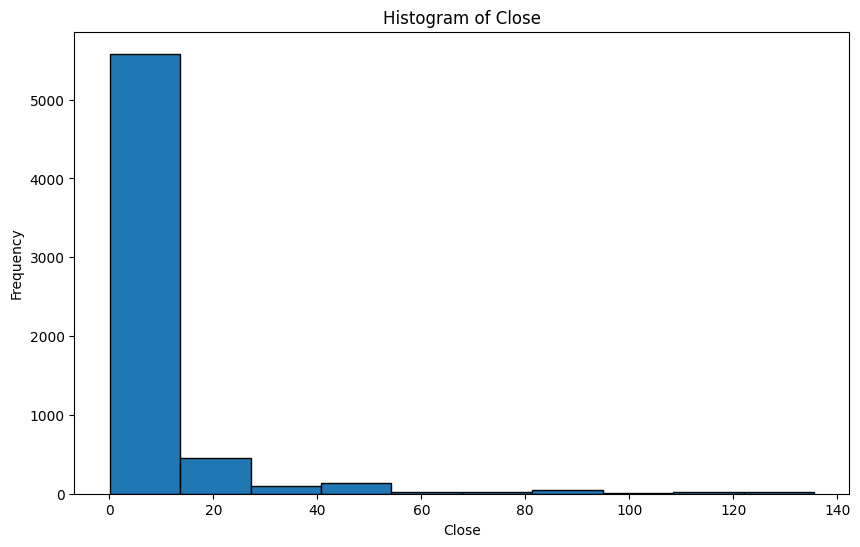

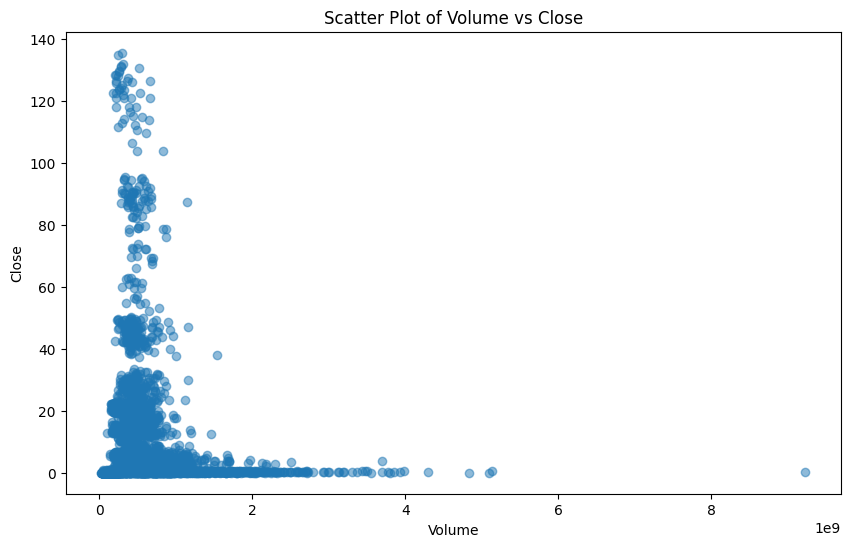

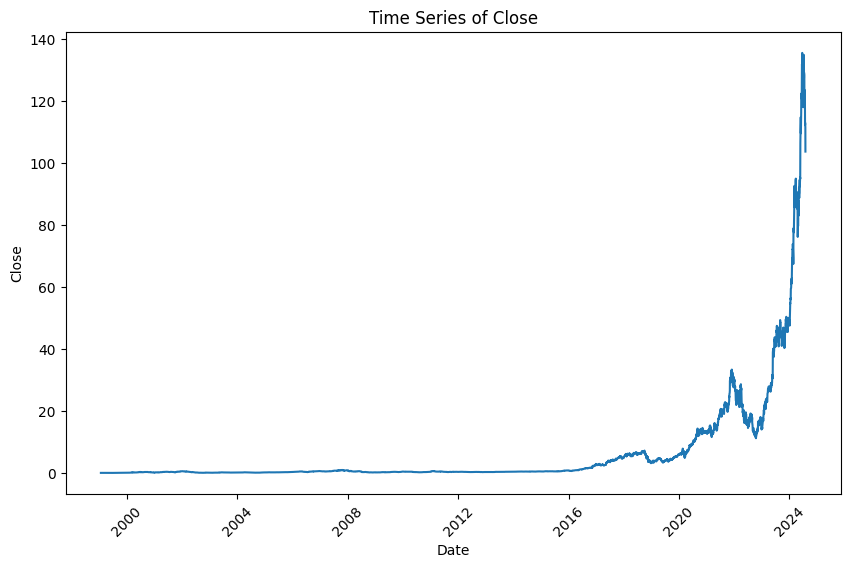

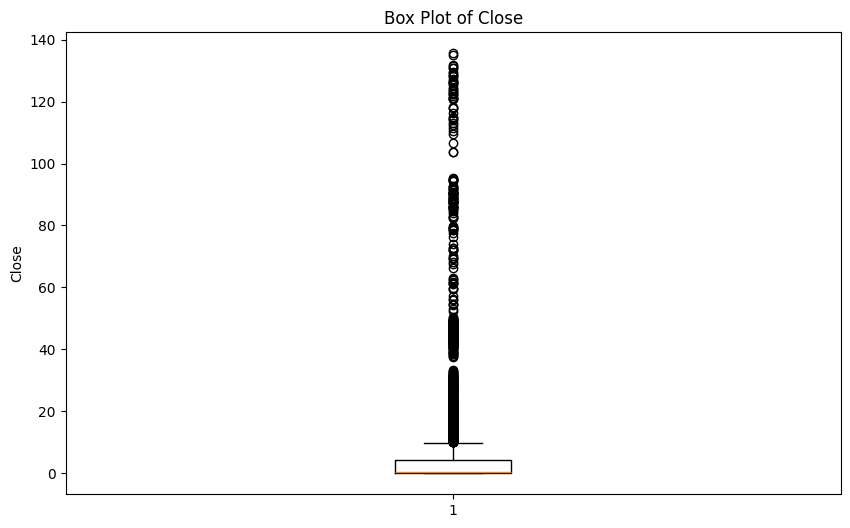

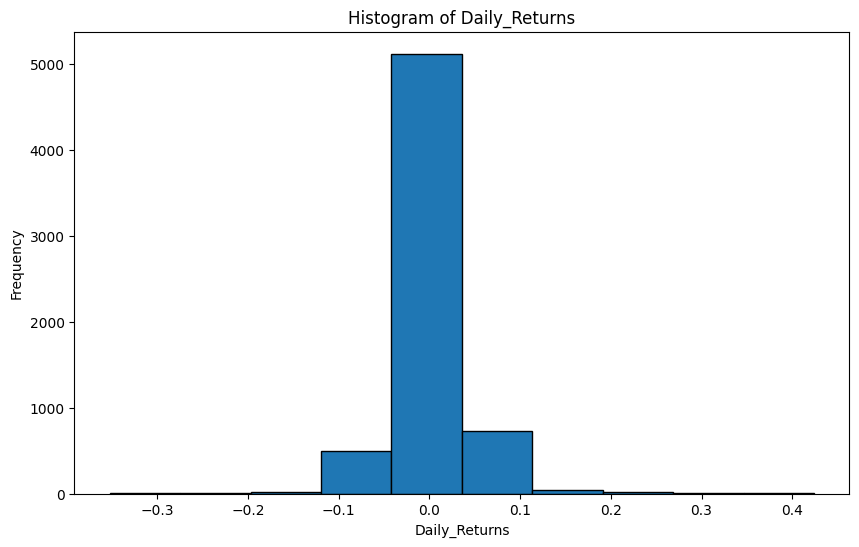

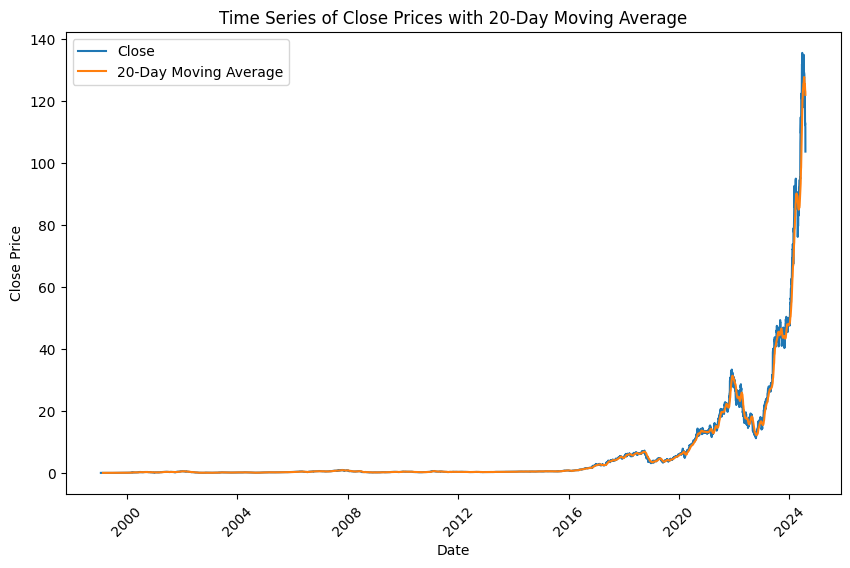

In [4]:

# Convert 'Date' column to datetime
data = convert_to_datetime(data, 'Date')

# Plot histogram of 'Close' prices
plot_histogram(data, 'Close')

# Plot scatter plot of 'Volume' vs 'Close'
plot_scatter(data, 'Volume', 'Close')

# Plot time series of 'Close' prices
plot_time_series(data, 'Date', 'Close')

# Plot box plot of 'Close' prices
plot_boxplot(data, 'Close')

# Calculate daily returns for the 'Close' column
data = calculate_daily_returns(data, 'Close')

# Plot histogram of daily returns
plot_histogram(data, 'Daily_Returns')

# Calculate 20-day moving average for the 'Close' column
data = calculate_moving_average(data, 'Close', 20)

# Plot time series of 'Close' prices with 20-day moving average
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Close')
plt.plot(data['Date'], data['MA_20'], label='20-Day Moving Average')
plt.title('Time Series of Close Prices with 20-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()
